In [1]:
pip install pynsee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 25.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pynsee.macrodata.get_series_list import get_series_list
from pynsee.macrodata.get_series import get_series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from datetime import datetime

In [3]:
from pynsee import init_conn
init_conn(insee_key='OhPJjhlU6BcU1jgxYWzIWq1RcUka', insee_secret='pjqgGXAy7co3cMD4zZ8aytN5tq4a')

/opt/mamba/lib/python3.10/site-packages/pynsee/utils/_wait_api_query_limit.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  qCount.loc[r, "oneMin"] = (


In [4]:
#On récupère les prix à l'importation de l'énergie via l'API
energie_prix_import_insee = get_series('010535859')
##Idem pour l'Indice des Prix de Production total Industrie et l'Indice des Prix à la Consommation total
IPP_tot_insee = get_series('010535587')
IPC_tot_insee = get_series('001759970')

1/1 - Getting series: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


In [12]:
print(energie_prix_import)

             OBS_VALUE
TIME_PERIOD           
2011-01-01       138.4
2011-02-01       144.7
2011-03-01       152.5
2011-04-01       157.2
2011-05-01       150.9
...                ...
2023-05-01       169.7
2023-06-01       163.2
2023-07-01       168.9
2023-08-01       183.3
2023-09-01       199.4

[153 rows x 1 columns]


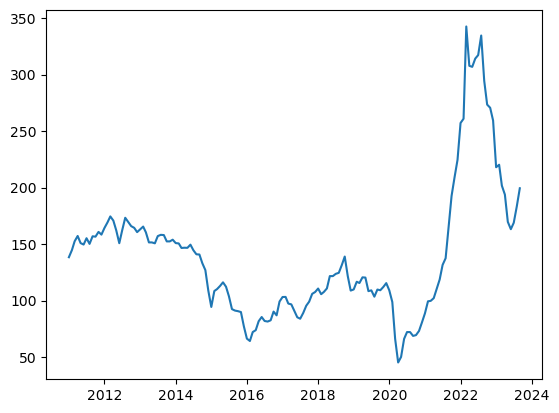

In [10]:
plt.plot(energie_prix_import)

In [14]:
df = pd.DataFrame({
    'prix':energie_prix_import['OBS_VALUE'],
    'index': range(len(energie_prix_import['OBS_VALUE']))
})

# Define the independent variable (X) and the dependent variable (y)
X = df['index']
y = df['prix']

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     7.427
Date:                Tue, 28 Nov 2023   Prob (F-statistic):            0.00719
Time:                        08:26:51   Log-Likelihood:                -836.29
No. Observations:                 153   AIC:                             1677.
Df Residuals:                     151   BIC:                             1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.3327      9.269     12.659      0.0

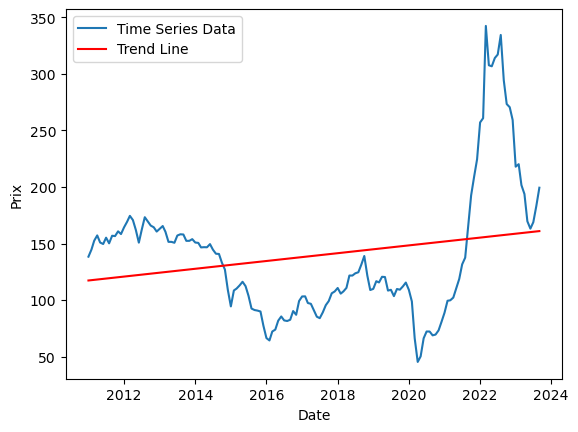

In [15]:
# Plot the time series data
plt.plot(df.index, df['prix'], label='Time Series Data')

# Plot the regression line
plt.plot(df.index, model.predict(X), color='red', label='Trend Line')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()

# Show the plot
plt.show()

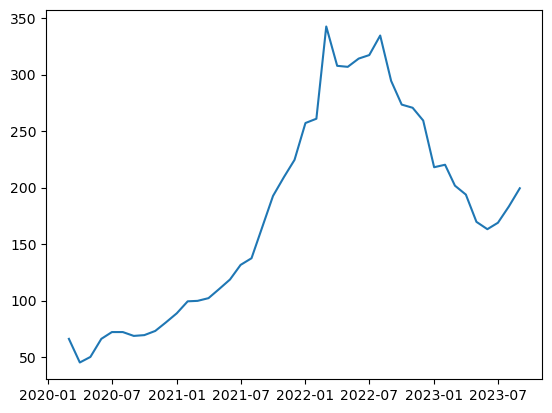

In [24]:
recent = energie_prix_import.loc['2020-03-01':]
plt.plot(recent)

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     39.58
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.66e-07
Time:                        08:36:59   Log-Likelihood:                -239.82
No. Observations:                  43   AIC:                             483.6
Df Residuals:                      41   BIC:                             487.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4308     19.633      3.587      0.0

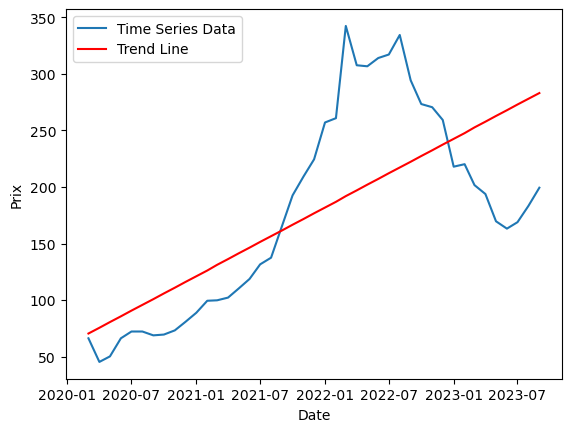

In [26]:
df = pd.DataFrame({
    'prix':recent['OBS_VALUE'],
    'index': range(len(recent['OBS_VALUE']))
})

# Define the independent variable (X) and the dependent variable (y)
X = df['index']
y = df['prix']

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())
# Plot the time series data
plt.plot(df.index, df['prix'], label='Time Series Data')

# Plot the regression line
plt.plot(df.index, model.predict(X), color='red', label='Trend Line')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()

# Show the plot
plt.show()

In [27]:
print(IPC_tot_insee)

          DATE TIME_PERIOD  OBS_VALUE OBS_STATUS OBS_QUAL OBS_TYPE  \
0   1990-01-01     1990-01      66.42          A      DEF        A   
1   1990-02-01     1990-02      66.56          A      DEF        A   
2   1990-03-01     1990-03      66.72          A      DEF        A   
3   1990-04-01     1990-04      67.09          A      DEF        A   
4   1990-05-01     1990-05      67.19          A      DEF        A   
..         ...         ...        ...        ...      ...      ...   
401 2023-06-01     2023-06     117.65          A      DEF        A   
402 2023-07-01     2023-07     117.71          A      DEF        A   
403 2023-08-01     2023-08     118.89          A      DEF        A   
404 2023-09-01     2023-09     118.26          A      DEF        A   
405 2023-10-01     2023-10     118.43          A      DEF        A   

        DATE_JO OBS_REV     IDBANK FREQ  ... REF_AREA DECIMALS  \
0    1990-03-01     NaN  001759970    M  ...       FE        2   
1    1990-03-30     NaN  00

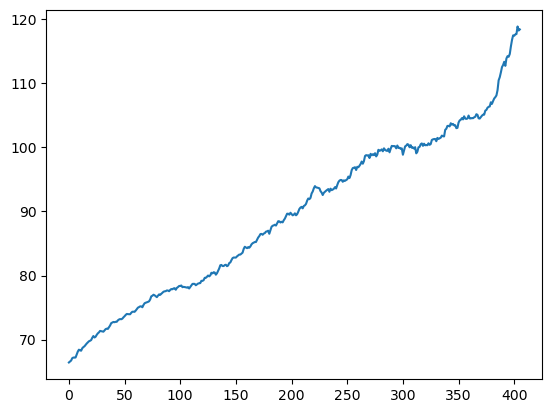

In [29]:
plt.plot(IPC_tot_insee['OBS_VALUE'])

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.556e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:50:03   Log-Likelihood:                -767.36
No. Observations:                 406   AIC:                             1539.
Df Residuals:                     404   BIC:                             1547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5350      0.159    424.512      0.0

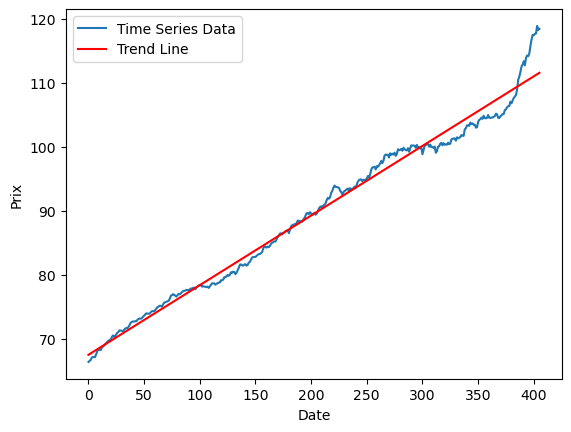

In [30]:
df = pd.DataFrame({
    'prix':IPC_tot_insee['OBS_VALUE'],
    'index': range(len(IPC_tot_insee['OBS_VALUE']))
})

# Define the independent variable (X) and the dependent variable (y)
X = df['index']
y = df['prix']

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())
# Plot the time series data
plt.plot(df.index, df['prix'], label='Time Series Data')

# Plot the regression line
plt.plot(df.index, model.predict(X), color='red', label='Trend Line')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()

# Show the plot
plt.show()

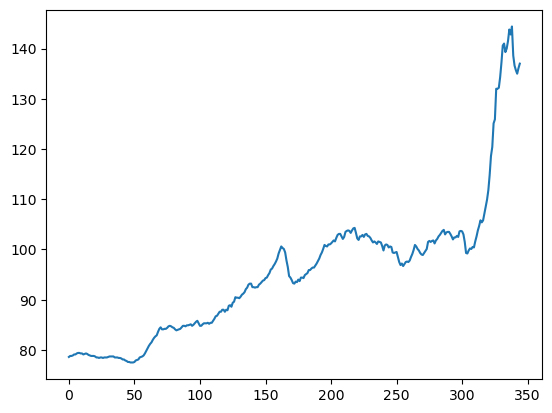

In [35]:
plt.plot(IPP_tot_insee['OBS_VALUE'])

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1133.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.97e-111
Time:                        08:54:18   Log-Likelihood:                -1150.5
No. Observations:                 345   AIC:                             2305.
Df Residuals:                     343   BIC:                             2313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.0985      0.732    101.241      0.0

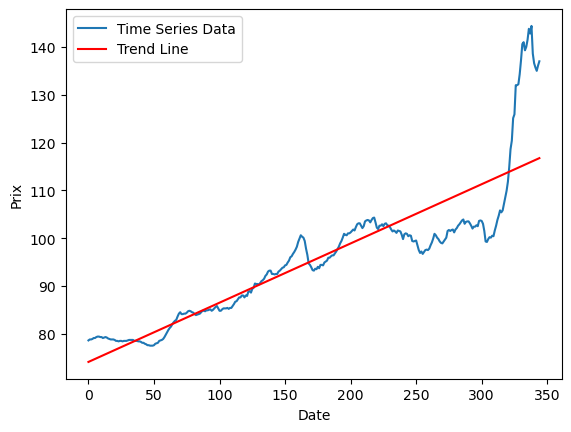

In [36]:
df = pd.DataFrame({
    'prix':IPP_tot_insee['OBS_VALUE'],
    'index': range(len(IPP_tot_insee['OBS_VALUE']))
})

# Define the independent variable (X) and the dependent variable (y)
X = df['index']
y = df['prix']

# Add a constant term to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())
# Plot the time series data
plt.plot(df.index, df['prix'], label='Time Series Data')

# Plot the regression line
plt.plot(df.index, model.predict(X), color='red', label='Trend Line')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()

# Show the plot
plt.show()

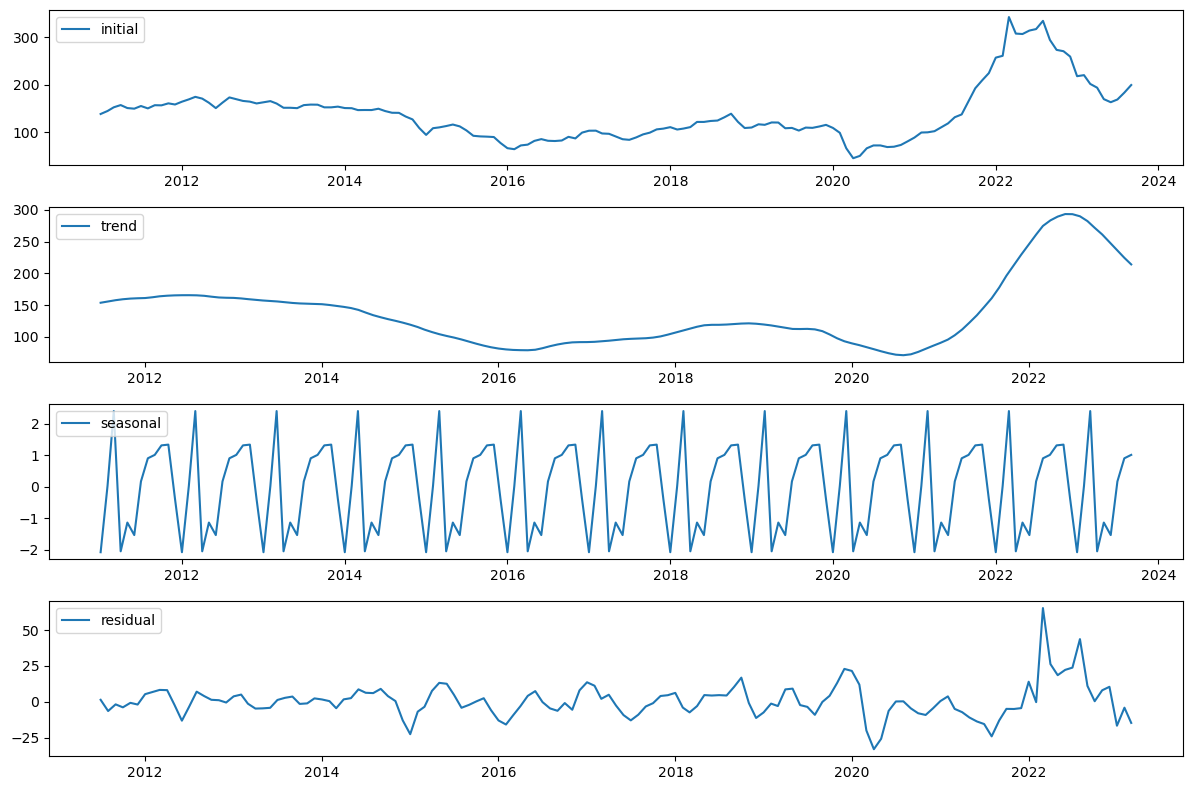

In [5]:
##Premières analyses des séries temporelles
energie_prix_import = energie_prix_import_insee.loc[:,['TIME_PERIOD','OBS_VALUE']]
energie_prix_import['TIME_PERIOD'] = pd.to_datetime(energie_prix_import['TIME_PERIOD'])
energie_prix_import.set_index('TIME_PERIOD',inplace=True)
result = seasonal_decompose(energie_prix_import,model='additive')
trend = result.trend
seasonal = result.seasonal
residual = result.resid
##Affichage graphique
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(energie_prix_import, label="initial")
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label="trend")
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label="seasonal")
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label="residual")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
##On transforme également IPP et IPC en séries temporelles IPP
IPP_tot = IPP_tot_insee.loc[:,['TIME_PERIOD','OBS_VALUE']]
IPP_tot['TIME_PERIOD'] = pd.to_datetime(IPP_tot['TIME_PERIOD'])
IPP_tot.set_index('TIME_PERIOD',inplace=True)
IPC_tot = IPC_tot_insee.loc[:,['TIME_PERIOD','OBS_VALUE']]
IPC_tot['TIME_PERIOD'] = pd.to_datetime(IPC_tot['TIME_PERIOD'])
IPC_tot.set_index('TIME_PERIOD',inplace=True)
##Test de stationnarité des séries temporelles
energy_adf = adfuller(energie_prix_import)
IPP_tot_adf = adfuller(IPP_tot)
IPC_tot_adf = adfuller(IPC_tot)
print('p-value',energy_adf[1])
print('p-value',IPP_tot_adf[1])
print('p-value',IPC_tot_adf[1])
##On ne peut nulle part rejeter l'hypothèse nulle de non stationnarité, il faudra donc différencier les séries avant de faire les régressions

p-value 0.6441179315609828
p-value 0.9936155890533314
p-value 0.9951997459907257


In [7]:
##On régresse d'abord les coûts de l'énergie sur les prix de production globaux en stationnarisant les séries
data = pd.merge(energie_prix_import,IPP_tot, on='TIME_PERIOD', how="inner")
##On différencie les données pour travailler avec des séries stationnaires
data_diff = data.diff().dropna()
##On crée les valeurs lag des observations qui serviront de variables au modèle
lag_x = data_diff['OBS_VALUE_x'].shift(1)
lag_y = data_diff['OBS_VALUE_y'].shift(1)
data_diff['lag_x'] = lag_x
data_diff['lag_y'] = lag_y
data_diff = data_diff.dropna()
##Modelisation
X = sm.add_constant(data_diff[['lag_x','lag_y']])
y = data_diff['OBS_VALUE_y']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
##On a déjà un effet significatif des coûts de l'énergie, à préciser l'interprétation

                            OLS Regression Results                            
Dep. Variable:            OBS_VALUE_y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     17.06
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.15e-07
Time:                        08:20:14   Log-Likelihood:                -222.69
No. Observations:                 151   AIC:                             451.4
Df Residuals:                     148   BIC:                             460.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.090      2.183      0.0

In [17]:
##Si on modélise sur période plus courte
data_sub = data[data.index>"2020-01-31"]
##On différencie les données pour travailler avec des séries stationnaires
data_sub_diff = data_sub.diff().dropna()
##On crée les valeurs lag des observations qui serviront de variables au modèle
lag_x = data_sub_diff['OBS_VALUE_x'].shift(1)
lag_y = data_sub_diff['OBS_VALUE_y'].shift(1)
data_sub_diff['lag_x'] = lag_x
data_sub_diff['lag_y'] = lag_y
data_sub_diff = data_sub_diff.dropna()
##Modelisation
X = sm.add_constant(data_sub_diff[['lag_x','lag_y']])
y = data_sub_diff['OBS_VALUE_y']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            OBS_VALUE_y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     4.011
Date:                Fri, 24 Nov 2023   Prob (F-statistic):             0.0260
Time:                        14:18:43   Log-Likelihood:                -83.446
No. Observations:                  42   AIC:                             172.9
Df Residuals:                      39   BIC:                             178.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7110      0.309      2.303      0.0

In [8]:
##Test de la relation de co-intégration
from statsmodels.tsa.api import VAR, coint
data = pd.merge(energie_prix_import,IPP_tot, on='TIME_PERIOD', how="inner")
cointegration_test = coint(data['OBS_VALUE_x'],data['OBS_VALUE_y'])
print('p-value pour test de cointegration',cointegration_test[1])
##p-valeur = 0.41 Donc il existe bien une relation de co-intégration entre nos variables

p-value pour test de cointegration 0.40916445101170035


In [19]:
##Raisonnement économétrique menant aux modèles ECM
data = pd.merge(energie_prix_import,IPP_tot, on='TIME_PERIOD', how="inner")
##Simple régression OLS
X = sm.add_constant(data[['OBS_VALUE_x']])
y = data['OBS_VALUE_y']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
##Comme la variable endogène n'est pas présente avec retard, on peut tester l'autocorrélation des résidus directement avec le test de Durbin-Watson
##le summary nous donne une valeur de 0.049, or pour que les résidus ne soient pas auto-corrélés à l'ordre 1, DW doit être proche de 2 (en pratique
##on accepte des modèle avec DW entre 1.5 et 2.5
##pour afficher directement la stat DW : 
from statsmodels.stats.stattools import durbin_watson
DW_stat = durbin_watson(results.resid)
print("La statistique de test de Durbin Watson a pour valeur : ",DW_stat)
##test d'homoscédasticité des résidus par le test de White
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,X)
print("p-valeur du test de White : ",white_test[1])
##On rejette l'hypothèse d'homoscédasticité des résidus (p-valeur < 5%)
##Test de normalité des résidus (test de Jarque-Bera)
from scipy.stats import jarque_bera
jb_stat, p_value_JB = jarque_bera(results.resid)
print("p-valeur du test de Jarque-Bera : ",p_value_JB)
##On rejette l'hypothèse nulle de normalité des résidus

##Donc une régression simple n'est pas interprétable dans ces conditions
##La procédure de Cochrane-Orcutt peut être utilisée pour corriger de l'autocorrélation des erreurs
##Elle calcule l'autocorrélation empirique des résidus (rho) puis crée les variables Yt-rhoY(t-1) et idem pour Xt et 
##calcule l'autocrrélation des résidus de cette nouvelle régression etc jusqu'à ce qu'on obtienne une autocorrélation nulle
##Assure plus de confiance dans les test de Student et la significativité statistique des coefficients
from statsmodels.tsa.stattools import acf
acf_resid = acf(results.resid)
weights = -acf_resid[1:]
modele_cochrane_orcutt = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags':12, 'weights':weights})
print(modele_cochrane_orcutt.summary())

                            OLS Regression Results                            
Dep. Variable:            OBS_VALUE_y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     261.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           9.97e-35
Time:                        14:18:43   Log-Likelihood:                -526.60
No. Observations:                 153   AIC:                             1057.
Df Residuals:                     151   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.2048      1.585     52.495      

In [20]:
##Test de rupture? Lorsque la plage de données est grande, il est possible que le phénomène économique d'intérêt ait subi des altérations et des ruptures.
##Le test de Chow peut être utilisé pour détecter des changements strucutrels dans les coefficients d'un modèle de régression
from statsmodels.stats.diagnostic import linear_harvey_collier
data["groupe"] = data.index>"2018-01-01"
data['interaction'] = data["groupe"]*data['OBS_VALUE_x']
#Modele avec interaction
modele_interaction = sm.OLS(data['OBS_VALUE_y'], sm.add_constant(data[['OBS_VALUE_x','interaction']])).fit()
modele_ss_interaction = sm.OLS(data['OBS_VALUE_y'], sm.add_constant(data[['OBS_VALUE_x']])).fit()
chow_test = modele_ss_interaction.compare_f_test(modele_interaction)
print(chow_test)
##Problème d'hétéroscédasticité et d'autocorrélation dans les résidus, ne donne pas de résultats utilisables
##Valeur de stat de 68.4, donc on s'attend tout de même à un rejet de l'hypothèse nulle

(68.36054829348649, nan, -1.0)


In [21]:
##Modele à Correction d'Erreur
##On a déjà validé l'hypothèse d'une relation de co-intégration, il faudrait vérifier que les séries considérées sont intégrées d'ordre 1
##Test de stationnarité des séries temporelles
data = pd.merge(energie_prix_import,IPP_tot, on='TIME_PERIOD', how="inner")
data_diff = data.diff().dropna()
energy_adf = adfuller(data_diff['OBS_VALUE_x'])
IPP_adf = adfuller(data_diff['OBS_VALUE_y'])
print('p-value',energy_adf[1])
print('p-value',IPP_adf[1])
##Parfait, les test de stationnarité rejettent l'hypothèse nulle de non stationanrité des séries utilisées
##Donc les hypothèses nécessaires pour mettre en place un modèle ECM sont bien vérifiées
##Equation de long terme
long_terme = sm.OLS(data['OBS_VALUE_y'], sm.add_constant(data[['OBS_VALUE_x']])).fit()
print(long_terme.summary())
residus = long_terme.resid
##Equation de court terme
residus_lag = pd.Series(residus.shift(1).dropna(), name='residus')
data_courte = pd.merge(data_diff,residus_lag, on='TIME_PERIOD', how="inner")
court_terme = sm.OLS(data_courte['OBS_VALUE_y'], sm.add_constant(data_courte[['OBS_VALUE_x','residus']])).fit()
print(court_terme.summary())
##Le coefficient devant residus peut s'interpréter comme une vitesse de convergence, il est bien négatif comme attendu
##Ici il vaut 1,4%, ce qui signifie qu'à chaque mois, la variable y comble 1,4% de l'écart à sa valeur de long terme (attention ici on a peu de variables explicatives)
##En l'absence de chocs consécutifs, il faudrait donc 100/1.4 = 71 mois soit environ 6 ans pour un retour à l'équilibre

##test de la stationnarité du résidu estimé en première étape
res_adf = adfuller(residus)
print('p-value',res_adf[1])
##Problème, on a un résidu non stationnaire bien que les séries régressées soient stationnaires...
##Attention, dans ce contexte de modèle ECM, aucune loi n'est connue pour les estimateurs, il est donc impossible d'interpréter les tests statistiques sur les coefficients

p-value 0.00043473487842457715
p-value 0.04591807062137716
                            OLS Regression Results                            
Dep. Variable:            OBS_VALUE_y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     261.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           9.97e-35
Time:                        14:18:44   Log-Likelihood:                -526.60
No. Observations:                 153   AIC:                             1057.
Df Residuals:                     151   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [22]:
##Pour limiter le biais introduit à la première étape, Stock et Watson propose des dynamic OLS, où on introduit symétriquement des variations avance et retard dans la première étape
data = pd.merge(energie_prix_import,IPP_tot, on='TIME_PERIOD', how="inner")
nombre_retard = 2
for i in range(1,nombre_retard+1):
    data[f'Delta_X_lag_{i}'] = data['OBS_VALUE_x']-data['OBS_VALUE_x'].shift(i)
    data[f'Delta_X_lead_{i}'] = data['OBS_VALUE_x']-data['OBS_VALUE_x'].shift(-i)
data = data.dropna()

##Equation de long terme
long_terme = sm.OLS(data['OBS_VALUE_y'], sm.add_constant(data[['OBS_VALUE_x','Delta_X_lag_1','Delta_X_lag_2','Delta_X_lead_1','Delta_X_lead_2']])).fit()
print(long_terme.summary())
residus = long_terme.resid
##test de la stationnarité du résidu estimé en première étape
res_adf = adfuller(residus)
print('p-value',res_adf[1])
##Toujours pas stationnaire

##Equation de court terme
##Attention il faut un peu transformer le résidu avant de l'introduire dans l'équation de court terme
residus_trans = data['OBS_VALUE_y']-long_terme.params['OBS_VALUE_x']*data['OBS_VALUE_x']-long_terme.params['const']
residus_lag = pd.Series(residus_trans.shift(1).dropna(), name='residus')
data_courte = pd.merge(data_diff,residus_lag, on='TIME_PERIOD', how="inner")
court_terme = sm.OLS(data_courte['OBS_VALUE_y'], sm.add_constant(data_courte[['OBS_VALUE_x','residus']])).fit()
print(court_terme.summary())
##On passe de 1,4% à 1,8% pour la force de rappel, pas de grande différence

                            OLS Regression Results                            
Dep. Variable:            OBS_VALUE_y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     66.96
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           9.61e-36
Time:                        14:18:44   Log-Likelihood:                -493.53
No. Observations:                 149   AIC:                             999.1
Df Residuals:                     143   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             82.3210      1.460     56.